# Importing Libraries

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Test set Image Processing

In [19]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [20]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image

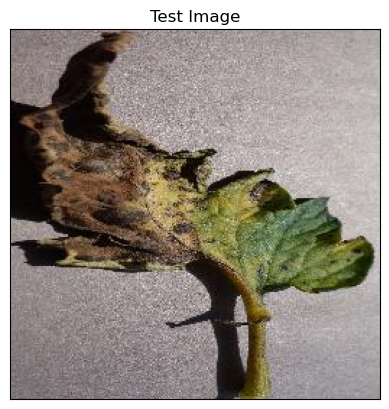

In [29]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoEarlyBlight1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [30]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [31]:
print(predictions)

[[9.23300476e-08 6.40279652e-08 2.39894405e-07 4.34681660e-08
  1.25655761e-08 1.57881345e-07 1.70965020e-08 1.97045907e-07
  8.85454270e-08 5.26842356e-08 1.53948643e-09 2.03392347e-07
  5.07169643e-05 1.04002459e-06 9.43887968e-10 1.21294264e-09
  5.58188140e-06 5.41498357e-09 2.60135112e-05 1.12201015e-07
  2.97895167e-06 3.48527428e-05 2.07595846e-07 3.05690975e-08
  2.17415792e-08 4.87399854e-09 4.32692332e-06 3.30517169e-10
  1.76765525e-06 2.04389691e-01 7.93407083e-01 2.02363808e-05
  2.03790423e-03 2.32494997e-07 1.55054852e-06 4.15904054e-07
  1.40431148e-05 8.49258619e-09]]


In [32]:
result_index = np.argmax(predictions)
print(result_index)

30


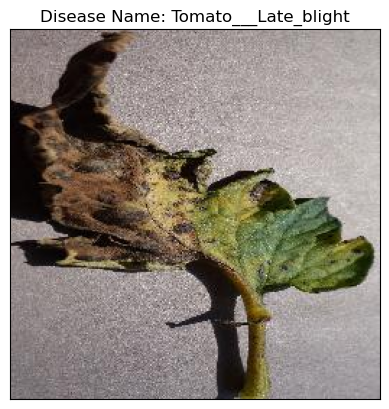

In [33]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
documents=[

'Black Rot : Prune and destroy infected fruit and branches. Use fungicides like captan or sulfur.',
'Cedar Apple Rust: Remove nearby juniper trees. Apply fungicides like myclobutanil, mancozeb, sulfur, or copper early in the season.',
'Mummy Berry:Rake and mulch fallen berries.Use fungicides like propiconazole or azoxystrobin during flowering.',
'Powdery Mildew:Prune for good air flow.Apply sulfur-based or oil-based fungicides preventively.',
'Cercospora Leaf Spot, Common Rust, Northern Leaf Blight:Use resistant hybrid seeds.Apply fungicides like chlorothalonil, mancozeb, or azoxystrobin during risk periods.',
'Black Rot, Esca, Leaf Blight:Remove old fruit and infected leaves.Spray fungicides like copper or systemic products early in the season.',
'Citrus Greening (HLB):Control psyllid insects using insecticides.Remove infected trees.Experimental methods include heat treatment.',
'Bacterial Spot:Use resistant varieties.Avoid overhead watering.Spray copper-based bactericides.',
'Early Blight, Late Blight:Rotate crops and remove infected debris.Spray chlorothalonil or mancozeb preventively.',
'Downy Mildew, Frog-eye Leaf Spot:Use resistant varieties.Apply fungicides like mancozeb or chlorothalonil.',
'Powdery Mildew:Provide spacing and good air flow.Use potassium bicarbonate or sulfur sprays.',
'Leaf Scorch:Use resistant varieties.Apply fungicides like captan',
'Bacterial Spot:Remove plant debris and avoid leaf wetting.Use copper bactericides.',
'Early Blight, Late BlightRotate crops and destroy infected leaves.Use fungicides like chlorothalonil or mancozeb.',
'Leaf Mold:Improve air circulation and lower humidity.Apply protective fungicides.',
'Septoria Leaf Spot:Use mancozeb or chlorothalonil at early stages.',
'Spider Mites:Spray plants with water.:Use predatory mites or miticides.',
'Target Spot:Apply fungicides like chlorothalonil.',
'Tomato Mosaic Virus:Remove infected plants.Practice tool sanitation and avoid touching plants when wet.',
'Tomato Yellow Leaf Curl Virus:Use resistant varieties.Control whitefly insects with insecticides.'

]

In [37]:
import cohere
import numpy as np


co = cohere.Client("25xymcEmgWCL7V2xDtP9j1stk3kXRGehhkUcY9i2") 



doc_embeddings = co.embed(
    texts=documents,
    model="embed-english-v3.0",
    input_type="search_document" 
).embeddings

query = f"What is solution  of {model_prediction}?"


query_embedding = co.embed(
    texts=[query],
    model="embed-english-v3.0",
    input_type="search_query" 
).embeddings[0]


def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

scores = [cosine_similarity(query_embedding, doc) for doc in doc_embeddings]


best_idx = np.argmax(scores)
print("Query:", query)
print("Most Relevant Answer:", documents[best_idx])

print('''General Tips for All Diseases
Use disease-resistant plant varieties.
Clean up plant debris.
Avoid overhead watering when possible.
Apply appropriate fungicides or insecticides early, especially in humid or rainy weather.
Rotate crops yearly to reduce disease buildup in the soil
''')

Query: What is solution  of Tomato___Late_blight?
Most Relevant Answer: Early Blight, Late BlightRotate crops and destroy infected leaves.Use fungicides like chlorothalonil or mancozeb.
General Tips for All Diseases
Use disease-resistant plant varieties.
Clean up plant debris.
Avoid overhead watering when possible.
Apply appropriate fungicides or insecticides early, especially in humid or rainy weather.
Rotate crops yearly to reduce disease buildup in the soil

